### Titanic

> Train data

In [1]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Training Data
data = pd.read_csv('Titanic_train.csv')
df = data.copy()

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# Integer data columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.Name.describe()

count                         891
unique                        891
top       Green, Mr. George Henry
freq                            1
Name: Name, dtype: object

In [11]:
# The Name column 891 different values for 891 different Rows, This column has no specific impact
# on thr Survived status.. so let's Delete the column

In [13]:
df = df.drop('Name',axis=1)

In [16]:
# Column "Sex"
df.Sex.describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [22]:
# Applying Label Encoding to Sex Column
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df.Sex = LE.fit_transform(df.Sex)
df.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [25]:
# Column "Ticket"
df.Ticket.describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [36]:
df[df['Ticket']=='1601']

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,1,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,1,28.0,0,0,1601,56.4958,NaN,S
509,510,1,3,1,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,1,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,1,NaN,0,0,1601,56.4958,NaN,S
826,827,0,3,1,NaN,0,0,1601,56.4958,NaN,S
838,839,1,3,1,32.0,0,0,1601,56.4958,NaN,S


In [39]:
# Applying Mean Encoding to the Ticket Column..
ME = df.groupby('Ticket')['Survived'].mean().to_dict()
df['Ticket'] = df.Ticket.map(ME)
df.Ticket.head()

0    0.0
1    1.0
2    1.0
3    0.5
4    0.0
Name: Ticket, dtype: float64

In [43]:
# column "Cabin"
df.Cabin.describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [59]:
kk = df['Cabin'].isna().sum() / df.shape[0] *100
print(f'almost {round(kk,3)} % data is Missing')

almost 77.104 % data is Missing


* I'm Gonna delete This column 

In [60]:
df = df.drop('Cabin',axis=1)

In [64]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

> Column "Embarked" is a place of Boarding 
* S : Southampton // People Mostly boarded from here
* C : Cherbourg //
* Q : Queenstown // Very Less people Boarded from here

* * Let's do Label Encoding to this Column "Embarked"

In [80]:
df.Embarked.unique()
df.Embarked = df.Embarked.fillna('NA')

In [85]:
#  Applying Labels to "Embarked"
LE = LabelEncoder()
df.Embarked = LE.fit_transform(df.Embarked)
df.Embarked.unique()

array([3, 0, 2, 1], dtype=int64)

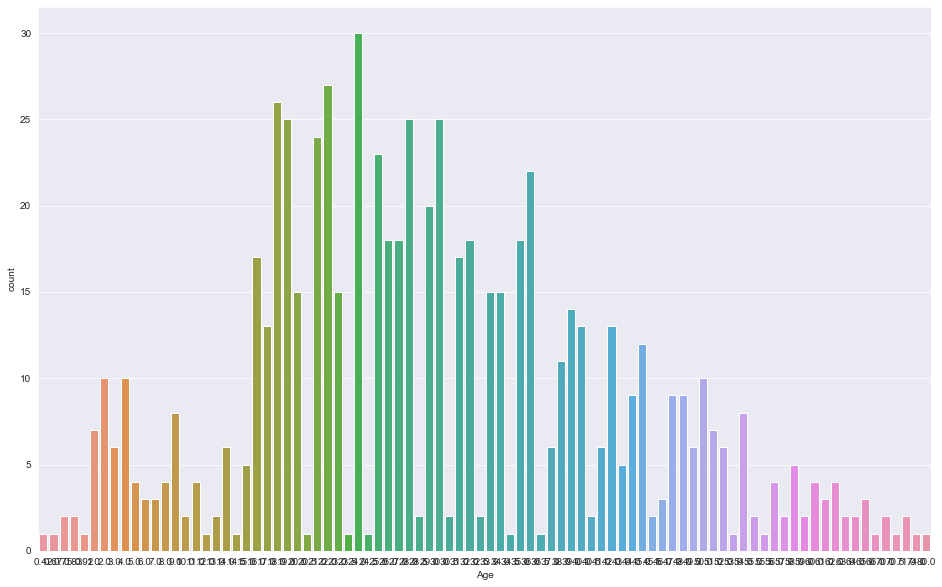

In [103]:
plt.figure(figsize=(16,10))
sns.set_style('darkgrid')
sns.countplot(df.Age)
plt.show()

In [111]:
df.Age = df.Age.interpolate()

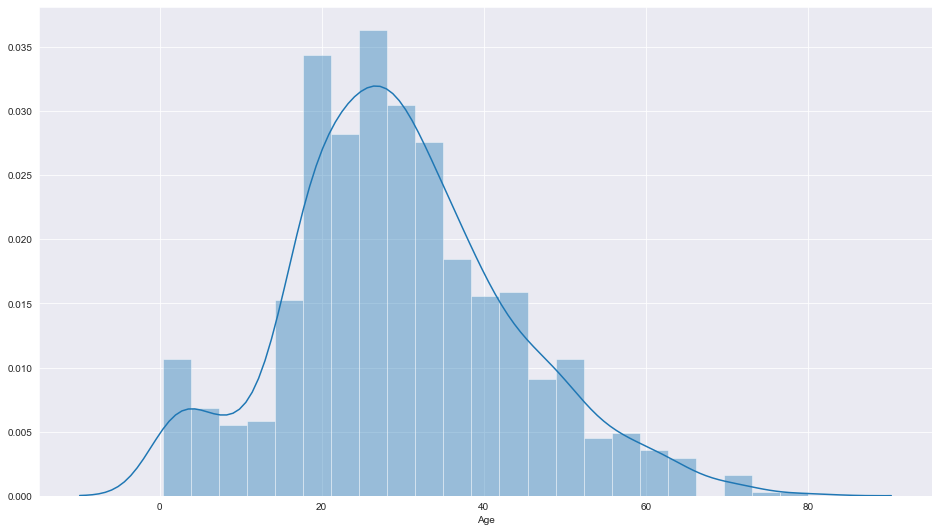

In [113]:
plt.figure(figsize=(16,9))
sns.set_style('darkgrid')
sns.distplot(df.Age)
plt.show()

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null float64
Fare           891 non-null float64
Embarked       891 non-null int64
dtypes: float64(3), int64(7)
memory usage: 69.7 KB


* * Let's Analyse the Data and Do the Feature Selection

In [122]:
corr = df.corr()['Survived']
corr

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex           -0.543351
Age           -0.062164
SibSp         -0.035322
Parch          0.081629
Ticket         0.927549
Fare           0.257307
Embarked      -0.174963
Name: Survived, dtype: float64

* Understand the Correlation between the Columns
* Let's remove the Columns which have low Correlation than 0.2

In [140]:
# Columns which has Highest correlation than 0.2
# CC = ['PassengerId','Parch','Ticket','Fare']
DF = df[['PassengerId','Parch','Ticket','Fare','Survived']]

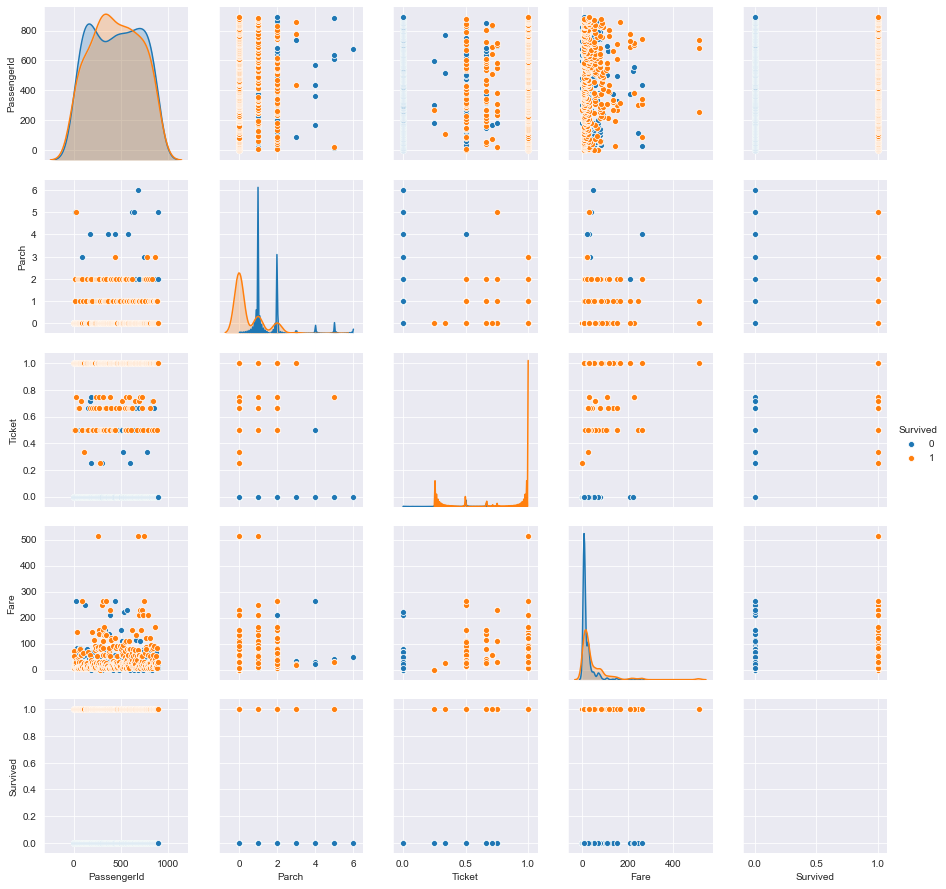

In [166]:
sns.pairplot(DF,hue='Survived')

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [151]:
xt,XT,yt,YT = train_test_split(DF.iloc[:,:-1],DF.iloc[:,-1],test_size = 0.3)

> Logistic Regression

In [153]:
from sklearn.linear_model import LogisticRegression
log_mod = LogisticRegression()
log_mod.fit(xt,yt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
YTP = log_mod.predict(XT)
print(accuracy_score(YT,YTP))
print(confusion_matrix(YT,YTP))

0.917910447761194
[[151  14]
 [  8  95]]


> Decision-Tree-Classifier

In [157]:
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
DTC_mod = DecisionTreeClassifier()
ETC_mod = ExtraTreeClassifier()
# Fitting the model
DTC_mod.fit(xt,yt)
ETC_mod.fit(xt,yt)

ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random')

In [158]:
# Decision Tree
YTP = DTC_mod.predict(XT)
print(accuracy_score(YT,YTP))
print(confusion_matrix(YT,YTP))

0.914179104477612
[[150  15]
 [  8  95]]


In [159]:
# Extra Tree 
YTP = ETC_mod.predict(XT)
print(accuracy_score(YT,YTP))
print(confusion_matrix(YT,YTP))

0.9067164179104478
[[150  15]
 [ 10  93]]


> Random Forest

In [163]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
RFC_mod = RandomForestClassifier(n_estimators = 500)
GBC_mod = GradientBoostingClassifier()
ABC_mod = AdaBoostClassifier()
# Fitting Model
RFC_mod.fit(xt,yt)
GBC_mod.fit(xt,yt)
ABC_mod.fit(xt,yt)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [170]:
# RFC
YTP = RFC_mod.predict(XT)
print(accuracy_score(YT,YTP))
print(confusion_matrix(YT,YTP))
print('*'*10)
# GBC
YTP = GBC_mod.predict(XT)
print(accuracy_score(YT,YTP))
print(confusion_matrix(YT,YTP))
print('*'*10)
# ABC
YTP = ABC_mod.predict(XT)
print(accuracy_score(YT,YTP))
print(confusion_matrix(YT,YTP))

0.8955223880597015
[[147  18]
 [ 10  93]]
**********
0.9029850746268657
[[149  16]
 [ 10  93]]
**********
0.9104477611940298
[[148  17]
 [  7  96]]
